In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
import os
os.chdir("gdrive/My Drive/Titanic")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
train_df=pd.read_csv('train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print('Columns are:')
print(train_df.columns)
print('******************')
print('Shape is:')
print(train_df.shape)
print('******************')
print('Info:')
print(train_df.info())
print('******************')
print('Describe:')
print(train_df.describe())

Columns are:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
******************
Shape is:
(891, 12)
******************
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
*********

In [ ]:
 train_df=train_df.drop('Name',axis=1)
train_df


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
train_df=train_df.drop('Ticket',axis=1)
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,30.0000,B42,S
888,889,0,3,female,NaN,1,2,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,30.0000,C148,C


In [ ]:
#checking for null
train_df.isnull().sum()/len(train_df.index)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [ ]:
#checking for duplicate rows
train_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

<pre> There are lots of NaN values,we will do imputation to handle them.We will replace them by the mean along axis. </pre>

In [ ]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(copy=False)
train_df_dup=train_df
train_df_dup

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,30.0000,B42,S
888,889,0,3,female,NaN,1,2,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,30.0000,C148,C


In [ ]:
# imp.fit(train_df_dup)
# imp.transform(train_df_dup)
# train_df_dup.fillna(train_df_dup.mean())
# train_df_dup
train_df=train_df.drop('Cabin',axis=1)

In [ ]:
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [ ]:
# train_df_dup.fillna(train_df_dup.mean())
# train_df_dup
train_df['Age'].fillna((train_df['Age'].mean()), inplace=True)
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


<p>Deleted 'Name','Cabin','PassengerId' and 'Ticket' column.</p>
<p>None of the column is null.</p>
<p>No duplicates.</p>
<p>Imputed NaN values with Mean of the column.</p>

In [ ]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
#converting categorical to numeric
train_df['Sex']=train_df['Sex'].astype('category')
train_df['Embarked']=train_df['Embarked'].astype('category')

cat_features = train_df.select_dtypes(['category']).columns
# print(cat_features)
train_df[cat_features]= train_df[cat_features].apply(lambda x: x.cat.codes)
train_df



,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,2
1,2,1,1,0,38.000000,1,0,71.2833,0
2,3,1,3,0,26.000000,0,0,7.9250,2
3,4,1,1,0,35.000000,1,0,53.1000,2
4,5,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,2
887,888,1,1,0,19.000000,0,0,30.0000,2
888,889,0,3,0,29.699118,1,2,23.4500,2
889,890,1,1,1,26.000000,0,0,30.0000,0


In [ ]:
train_df=train_df.drop('PassengerId',axis=1)
x=train_df.iloc[:, 1:]
y=train_df['Survived']
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [ ]:
#splitting data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7,test_size = 0.3, random_state = 1234)


In [ ]:
print('Shape of X Train:',x_train.shape)
print('*****************')
print('Shape of X Test: ',x_test.shape)


Shape of X Train: (623, 7)
*****************
Shape of X Test:  (268, 7)


In [ ]:
#standardizing the data 
from sklearn.preprocessing import StandardScaler
columns = x_train.columns
scalerx = StandardScaler()
x_train_scaled = scalerx.fit_transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled, columns = columns)

x_test_scaled = scalerx.transform(x_test)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = columns)

# EDA and Visualizations

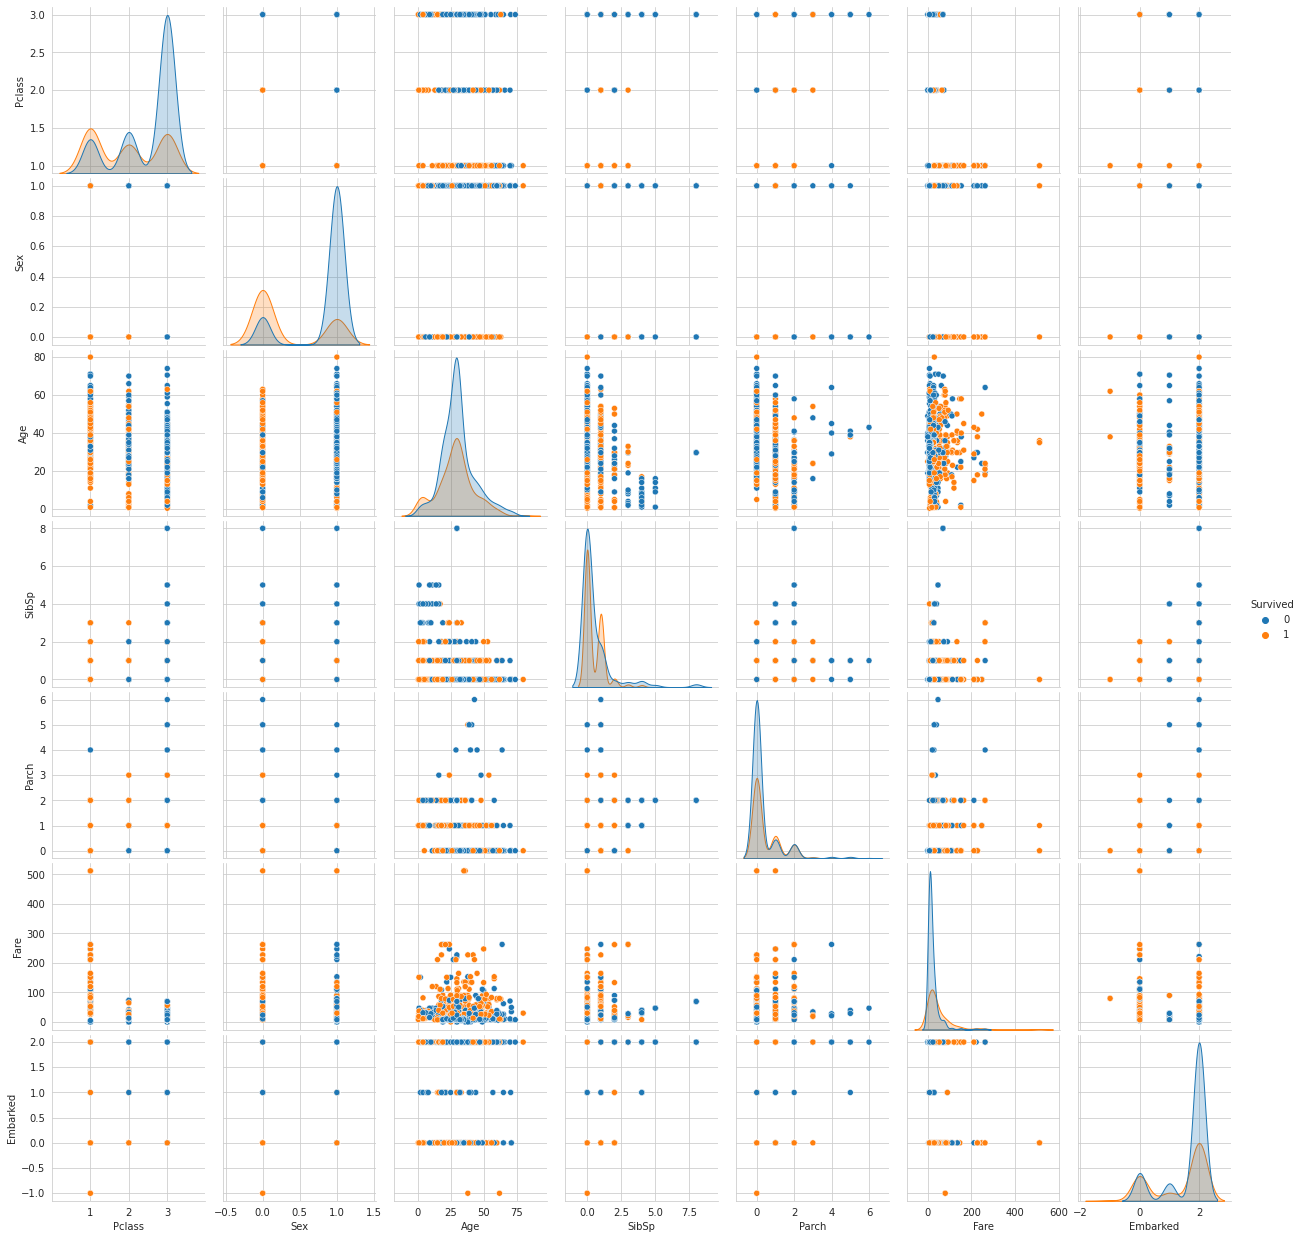

In [ ]:
#plotting pair plots as there very small number of features
sns.set_style('whitegrid')
sns.pairplot(train_df,hue='Survived')
plt.show()

<p> As we can see there is lots of overlapping so we cannot build a threshold for a simple model.All the features are now important.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


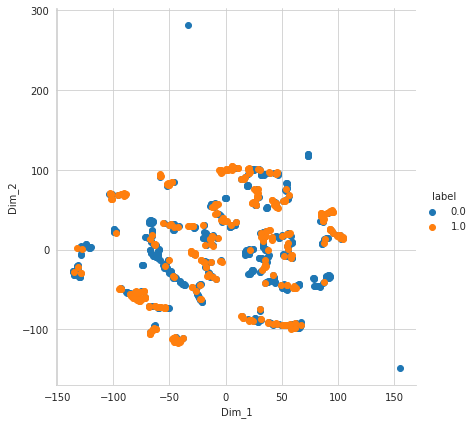

In [ ]:
#trying to visualize using t-SNE
from sklearn.manifold import TSNE

model=TSNE(n_components=2,perplexity=5,random_state=0,n_iter=3000)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000
tsne_data=model.fit_transform(x)

#creating a new data frame which help us in ploting the result data
# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, y)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [ ]:
#pca
from sklearn.decomposition import IncrementalPCA
pca=IncrementalPCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_scaled)

x_test_pca = pca.transform(x_test_scaled)

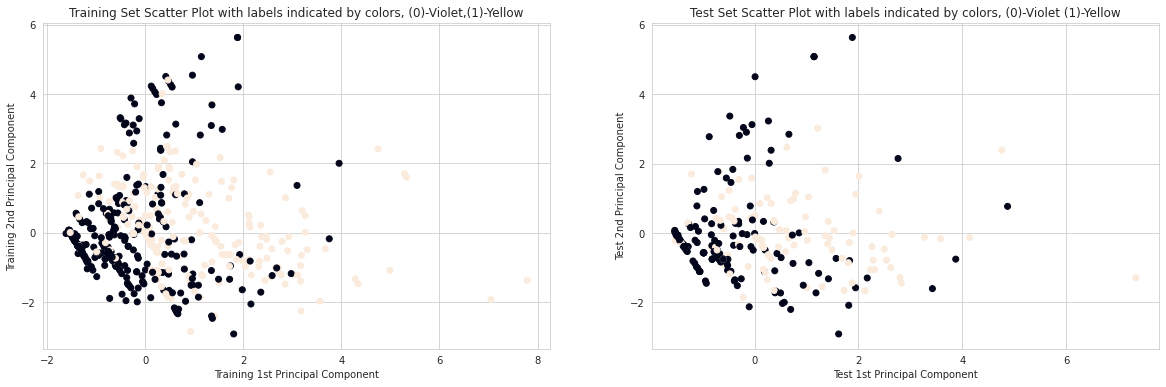

In [ ]:
plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.scatter(x_train_pca[:,0], x_train_pca[:,1], c = y_train)
plt.xlabel('Training 1st Principal Component')
plt.ylabel('Training 2nd Principal Component')
plt.title('Training Set Scatter Plot with labels indicated by colors, (0)-Violet,(1)-Yellow')
plt.subplot(1, 2, 2)
plt.scatter(x_test_pca[:,0], x_test_pca[:,1], c = y_test)
plt.xlabel('Test 1st Principal Component')
plt.ylabel('Test 2nd Principal Component')
plt.title('Test Set Scatter Plot with labels indicated by colors, (0)-Violet (1)-Yellow')
plt.show()

<p> As we can see data from tsne and pca data is  not that linearly seperable</p>

#Models

In [ ]:
#fitting logistic regression using cross validation
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]
#Using GridSearchCV
model = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'accuracy', return_train_score=True,verbose=3,cv=3)
model.fit(x_train_scaled, y_train)

print('Best Estimator is:',model.best_estimator_)
print('Accuracy is:',model.score(x_test_scaled, y_test))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END ......C=0.0001;, score=(train=0.614, test=0.615) total time=   0.0s
[CV 2/3] END ......C=0.0001;, score=(train=0.614, test=0.615) total time=   0.0s
[CV 3/3] END ......C=0.0001;, score=(train=0.615, test=0.614) total time=   0.0s
[CV 1/3] END ........C=0.01;, score=(train=0.771, test=0.812) total time=   0.0s
[CV 2/3] END ........C=0.01;, score=(train=0.812, test=0.750) total time=   0.0s
[CV 3/3] END ........C=0.01;, score=(train=0.786, test=0.807) total time=   0.0s
[CV 1/3] END ...........C=1;, score=(train=0.783, test=0.769) total time=   0.0s
[CV 2/3] END ...........C=1;, score=(train=0.805, test=0.784) total time=   0.0s
[CV 3/3] END ...........C=1;, score=(train=0.796, test=0.783) total time=   0.0s
[CV 1/3] END .........C=100;, score=(train=0.783, test=0.769) total time=   0.0s
[CV 2/3] END .........C=100;, score=(train=0.805, test=0.788) total time=   0.0s
[CV 3/3] END .........C=100;, score=(train=0.793,

In [ ]:
from sklearn import metrics
model=LogisticRegression(C=0.01).fit(x_train,y_train)
y_train_pred = model.predict(x_train)

y_test_pred = model.predict(x_test)

print('Training Accuracy of the Model: ', metrics.accuracy_score(y_train, y_train_pred))
print('Test Accuracy of the Model: ', metrics.accuracy_score(y_test, y_test_pred))


print('Training Precision of the Model: ', metrics.precision_score(y_train, y_train_pred))
print('Test Precision of the Model: ', metrics.precision_score(y_test, y_test_pred))

Training Accuracy of the Model:  0.7383627608346709
Test Accuracy of the Model:  0.7014925373134329
Training Precision of the Model:  0.8347826086956521
Test Precision of the Model:  0.72


In [ ]:
# knn with simple cross validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# split the data set into train and test
X_1, X_test, y_1, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_1, test_size=0.3)

for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i)

    # fitting the model on crossvalidation train
    knn.fit(X_tr, y_tr)

    # predict the response on the crossvalidation train
    pred = knn.predict(X_cv)

    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))
    
# knn = KNeighborsClassifier(1)
# knn.fit(X_tr,y_tr)
# pred = knn.predict(X_test)
# acc = accuracy_score(y_test, pred, normalize=True) * float(100)
# print('\n****Test accuracy for k = 1 is %d%%' % (acc))


CV accuracy for k = 1 is 67%

CV accuracy for k = 3 is 71%

CV accuracy for k = 5 is 72%

CV accuracy for k = 7 is 67%

CV accuracy for k = 9 is 71%

CV accuracy for k = 11 is 66%

CV accuracy for k = 13 is 67%

CV accuracy for k = 15 is 67%

CV accuracy for k = 17 is 67%

CV accuracy for k = 19 is 66%

CV accuracy for k = 21 is 65%

CV accuracy for k = 23 is 66%

CV accuracy for k = 25 is 67%

CV accuracy for k = 27 is 66%

CV accuracy for k = 29 is 67%


In [ ]:
knn = KNeighborsClassifier(n_neighbors=23,weights='distance')
knn.fit(X_tr,y_tr)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 23 is %d%%' % (acc))


****Test accuracy for k = 23 is 69%


In [ ]:
#svm
from sklearn.svm import SVC
param_grid= {'C': [10**-4,10**-3, 10**-2,10**-1,10**0,10, 10**2, 10**3,10**4],
                      'gamma':[1, 0.1, 0.01, 0.001, 0.0001],
                      'kernel': ['rbf']}
grid_search=GridSearchCV(SVC(),param_grid,scoring='accuracy',return_train_score=True,verbose=3,cv=5)
grid_search.fit(X_tr, y_tr)


print('Best Estimator is:',grid_search.best_estimator_)
print('Accuracy is:',grid_search.score(X_test, y_test))

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5] END C=0.0001, gamma=1, kernel=rbf;, score=(train=0.603, test=0.602) total time=   0.0s
[CV 2/5] END C=0.0001, gamma=1, kernel=rbf;, score=(train=0.605, test=0.598) total time=   0.0s
[CV 3/5] END C=0.0001, gamma=1, kernel=rbf;, score=(train=0.605, test=0.598) total time=   0.0s
[CV 4/5] END C=0.0001, gamma=1, kernel=rbf;, score=(train=0.602, test=0.609) total time=   0.0s
[CV 5/5] END C=0.0001, gamma=1, kernel=rbf;, score=(train=0.602, test=0.609) total time=   0.0s
[CV 1/5] END C=0.0001, gamma=0.1, kernel=rbf;, score=(train=0.603, test=0.602) total time=   0.0s
[CV 2/5] END C=0.0001, gamma=0.1, kernel=rbf;, score=(train=0.605, test=0.598) total time=   0.0s
[CV 3/5] END C=0.0001, gamma=0.1, kernel=rbf;, score=(train=0.605, test=0.598) total time=   0.0s
[CV 4/5] END C=0.0001, gamma=0.1, kernel=rbf;, score=(train=0.602, test=0.609) total time=   0.0s
[CV 5/5] END C=0.0001, gamma=0.1, kernel=rbf;, score=(train=0.602,

In [ ]:
test_df=pd.read_csv('test.csv')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [ ]:
test_df=test_df.drop('Name',axis=1)
test_df=test_df.drop('Ticket',axis=1)
test_df=test_df.drop('Cabin',axis=1)
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,NaN,0,0,8.0500,S


In [ ]:
test_df['Sex']=test_df['Sex'].astype('category')
test_df['Embarked']=test_df['Embarked'].astype('category')

cat_features_test = test_df.select_dtypes(['category']).columns
# print(cat_features)
test_df[cat_features_test]= test_df[cat_features_test].apply(lambda x: x.cat.codes)
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,1305,3,1,NaN,0,0,8.0500,2
414,1306,1,0,39.0,0,0,108.9000,0
415,1307,3,1,38.5,0,0,7.2500,2
416,1308,3,1,NaN,0,0,8.0500,2


In [ ]:
x_test_df=test_df.iloc[:, 1:]
y_test_df=test_df['PassengerId']
x_test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,NaN,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,3,1,38.5,0,0,7.2500,2
416,3,1,NaN,0,0,8.0500,2


In [ ]:
y_test_df

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [ ]:
columns_test=x_test_df.columns
x_test_df_scaled = scalerx.transform(x_test_df)
x_test_df_scaled = pd.DataFrame(x_test_df_scaled, columns = columns_test)
x_test_df_scaled

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.817109,0.757121,0.376073,-0.488795,-0.465805,-0.489019,-0.703263
1,0.817109,-1.320793,1.320109,0.465811,-0.465805,-0.505879,0.570379
2,-0.375066,0.757121,2.452953,-0.488795,-0.465805,-0.451235,-0.703263
3,0.817109,0.757121,-0.190348,-0.488795,-0.465805,-0.472076,0.570379
4,0.817109,-1.320793,-0.567963,0.465811,0.723525,-0.398371,0.570379
...,...,...,...,...,...,...,...
413,0.817109,0.757121,NaN,-0.488795,-0.465805,-0.484530,0.570379
414,-1.567241,-1.320793,0.715926,-0.488795,-0.465805,1.566000,-1.976906
415,0.817109,0.757121,0.678165,-0.488795,-0.465805,-0.500796,0.570379
416,0.817109,0.757121,NaN,-0.488795,-0.465805,-0.484530,0.570379


In [ ]:
x_test_df_scaled['Age'].fillna((x_test_df_scaled['Age'].mean()), inplace=True)
x_test_df_scaled['Pclass'].fillna((x_test_df_scaled['Pclass'].mean()), inplace=True)
x_test_df_scaled['SibSp'].fillna((x_test_df_scaled['SibSp'].mean()), inplace=True)
x_test_df_scaled['Parch'].fillna((x_test_df_scaled['Parch'].mean()), inplace=True)
x_test_df_scaled['Fare'].fillna((x_test_df_scaled['Fare'].mean()), inplace=True)
x_test_df_scaled['Embarked'].fillna((x_test_df_scaled['Embarked'].mean()), inplace=True)
x_test_df_scaled['Sex'].fillna((x_test_df_scaled['Sex'].mean()), inplace=True)
#x_test_df_scaled
print(np.any(np.isnan(x_test_df_scaled)))
print(np.all(np.isfinite(x_test_df_scaled)))
print(x_test_df_scaled['Age'].value_counts())
print(x_test_df_scaled['Pclass'].value_counts())
print(x_test_df_scaled['Embarked'].value_counts())
print(x_test_df_scaled['Sex'].value_counts())
print(x_test_df_scaled['Parch'].value_counts())
print(x_test_df_scaled['Fare'].value_counts())



False
True
 0.056807    86
-0.416917    17
-0.643486    17
-0.567963    16
 0.036220    15
             ..
 3.510273     1
-0.077064     1
-0.530201     1
 2.452953     1
 0.678165     1
Name: Age, Length: 80, dtype: int64
 0.817109    218
-1.567241    107
-0.375066     93
Name: Pclass, dtype: int64
 0.570379    270
-1.976906    102
-0.703263     46
Name: Embarked, dtype: int64
 0.757121    266
-1.320793    152
Name: Sex, dtype: int64
-0.465805     324
 0.723525      52
 1.912855      33
 3.102185       3
 4.291515       2
 10.238164      2
 6.670174       1
 5.480844       1
Name: Parch, dtype: int64
-0.490630    21
-0.119562    19
-0.484530    17
-0.383884    17
-0.434715    11
             ..
-0.471059     1
-0.489190     1
-0.475041     1
 0.955010     1
-0.193607     1
Name: Fare, Length: 170, dtype: int64


In [ ]:
svc=SVC(C=10000, gamma=0.0001,kernel='rbf')
svc.fit(x_train_scaled, y_train)

y_hat=svc.predict(x_test_df_scaled)
print(svc.score(x_test_df_scaled,y_test_df))
print(y_hat)

0.0
[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [ ]:
y_test_df

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [ ]:
final_df=(pd.DataFrame({
                'PassengerId':y_test_df,
                'Survived':y_hat
}))
final_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
final_df.to_csv('submissions.csv')

In [ ]:
final_df.to_csv('submission.csv',index=False)

In [ ]:
final_df


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
tp=pd.read_csv('submission.csv')
tp #ye sahi hua index=false karke

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
tp_df=pd.read_csv('submissions.csv')
tp_df

,Unnamed: 0,PassengerId,Survived
0,0,892,0
1,1,893,1
2,2,894,0
3,3,895,0
4,4,896,1
...,...,...,...
413,413,1305,0
414,414,1306,1
415,415,1307,0
416,416,1308,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(x_train_scaled, y_train)
y_hat_rn=svc.predict(x_test_df_scaled)
print(y_hat_rn)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [ ]:
final_df_rn=(pd.DataFrame({
                'PassengerId':y_test_df,
                'Survived':y_hat_rn
}))
final_df_rn

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
final_df_rn.to_csv('submission_rn.csv',index=False)

In [ ]:
final_df_rd=(pd.DataFrame({
                'PassengerId':y_test_df,
                'Survived':y_hat_rn
}))
final_df_rd

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
final_df_rd.to_csv('submission_rd.csv',index=False)